# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas as pd 
import scipy.signal

import os.path
from os import path

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [3]:
# file directory of data filtered in previous assignment
data_dir  = 'C:/Users/Documents/1.1 TIL Programming/NL_province.csv'

# read the csv data to dataframe and print head
df_province_selected = pd.read_csv(data_dir)
df_province_selected.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-15,-6.0,0.0,18.0,6.0,1.0,0.0
1,1,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-16,-10.0,-10.0,-38.0,-12.0,-2.0,1.0
2,2,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-17,3.0,-2.0,52.0,-24.0,-22.0,3.0
3,3,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-18,8.0,0.0,45.0,-21.0,-22.0,3.0
4,4,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-19,4.0,-4.0,49.0,-19.0,-22.0,2.0


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [4]:
# data was already filtered in Assignment 1, this data is reused here

The following show an example from extracting the data for South Holland, the Netherlands

In [5]:
df_province_selected.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-15,-6.0,0.0,18.0,6.0,1.0,0.0
1,1,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-16,-10.0,-10.0,-38.0,-12.0,-2.0,1.0
2,2,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-17,3.0,-2.0,52.0,-24.0,-22.0,3.0
3,3,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-18,8.0,0.0,45.0,-21.0,-22.0,3.0
4,4,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-19,4.0,-4.0,49.0,-19.0,-22.0,2.0


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [6]:
# modify the following line to make the function calculate the 'mean' when the statistic argument is empty.

def calculate_statistic(data, attributes, year, statistic='mean'):
    """calculate a statistic

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
    """
    
    # first select from year, then filter attributes
    data_year = data[data['date'].str.contains(year)]
    data_attr = data_year[attributes]
    
    # calculate mean of selected data
    if statistic == 'mean':
        data_final = data_attr.mean(axis=0)
    
    return data_final


#### Call your calculate_statistic function and print the results with three different input arguments

In [7]:
# select columns
columns1 = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline']
# use function
calculate_statistic(df_province_selected, columns1, '2020')

retail_and_recreation_percent_change_from_baseline   -15.739890
grocery_and_pharmacy_percent_change_from_baseline     -2.510262
dtype: float64

In [8]:
# select columns
columns2 = ['date', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']
# use function
calculate_statistic(df_province_selected, columns2, '2021')

parks_percent_change_from_baseline               114.143784
transit_stations_percent_change_from_baseline    -33.781079
dtype: float64

In [9]:
# select all columns
columns3 = df_province_selected.columns
# use function
calculate_statistic(df_province_selected, columns3, '2020')

Unnamed: 0                                            1925.500000
sub_region_2                                                  NaN
metro_area                                                    NaN
census_fips_code                                              NaN
retail_and_recreation_percent_change_from_baseline     -15.739890
grocery_and_pharmacy_percent_change_from_baseline       -2.510262
parks_percent_change_from_baseline                      77.949790
transit_stations_percent_change_from_baseline          -36.342078
workplaces_percent_change_from_baseline                -25.036950
residential_percent_change_from_baseline                 8.135254
dtype: float64

## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [10]:
# add datetime type of column from date to date2
df_convert_date = df_province_selected.loc[:,'date']  
df_province_selected['date2'] = pd.to_datetime(df_convert_date)

In [11]:
# average data over 7 days
df_province_agg = df_province_selected.resample('7D', on='date2').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

,date2,Unnamed: 0,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,1768.5,NaN,NaN,NaN,1.107143,-0.845238,9.309524,-3.785714,-7.452381,1.154762
1,2020-02-22,1775.5,NaN,NaN,NaN,4.714286,-0.452381,9.345238,-0.011905,-9.214286,1.595238
2,2020-02-29,1782.5,NaN,NaN,NaN,-0.273810,1.845238,6.321429,-0.273810,1.678571,0.607143
3,2020-03-07,1789.5,NaN,NaN,NaN,-2.952381,6.607143,9.690476,-6.250000,-1.345238,2.000000
4,2020-03-14,1796.5,NaN,NaN,NaN,-30.309524,6.523810,26.380952,-46.869048,-32.583333,12.809524


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


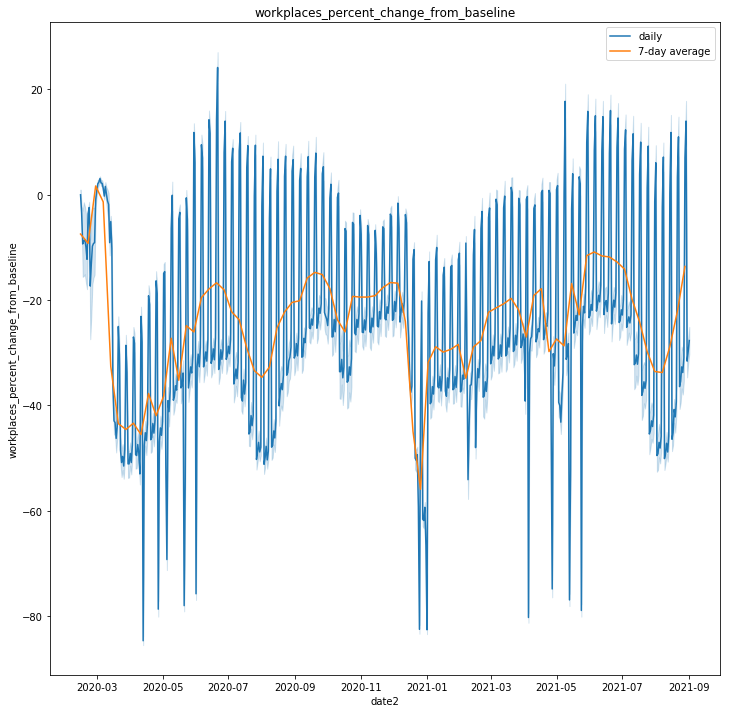

In [12]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date2', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date2', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [13]:
def my_find_peaks(data, activity, **kwargs):
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    # initialise peaks list
    peaks = []
    
    for row in data.index:
    # skip first and last iteration
        if row != 0 and row != (data.shape[0]-1):
            # if previous and next data points smaller --> add to peaks
            if data.iloc[row][activity] > data.iloc[(row-1)][activity] and data.iloc[row][activity] > data.iloc[(row+1)][activity]:
                peaks.append(data.iloc[row][activity])       
    return peaks

In [31]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'

# use function and print results
max_ind = my_find_peaks(df_province_agg, activity)
print(max_ind)

[6.607142857142857, -10.845238095238095, 0.8214285714285714, 5.785714285714286, 5.107142857142857, 3.738095238095238, 2.2738095238095237, -0.2857142857142857, -4.285714285714286, -4.0476190476190474, -2.1547619047619047, -2.988095238095238, -11.642857142857142, -9.55952380952381, 1.0595238095238095, 4.416666666666667, 17.13095238095238, 14.630952380952381, 16.488095238095237, 16.321428571428573]


In [15]:
# Assign the data related to the max_ind to df_max
# initialize counter (n) and dataframe df_max
n=0
df_max = pd.DataFrame()
    
# iterate over the rows and copy row if value is a peak from list max_ind
for row in df_province_agg.index:
    while n < len(max_ind):
        df_max = df_max.append(df_province_agg[(df_province_agg[activity] == max_ind[n])])
        n = n + 1
        
df_max.head()

,date2,Unnamed: 0,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
3,2020-03-07,1789.5,NaN,NaN,NaN,-2.952381,6.607143,9.690476,-6.250000,-1.345238,2.000000
7,2020-04-04,1817.5,NaN,NaN,NaN,-40.095238,-10.845238,47.285714,-55.880952,-43.357143,14.988095
14,2020-05-23,1866.5,NaN,NaN,NaN,-19.809524,0.821429,98.096386,-41.226190,-24.845238,9.273810
18,2020-06-20,1894.5,NaN,NaN,NaN,2.619048,5.785714,191.202532,-27.738095,-16.702381,4.952381
22,2020-07-18,1922.5,NaN,NaN,NaN,15.809524,5.107143,268.178082,-25.821429,-29.083333,4.488095


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


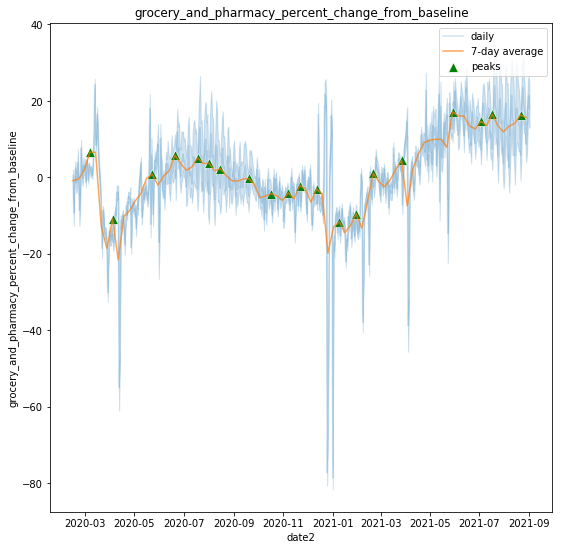

In [16]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date2', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date2', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date2', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [17]:
# function to find peaks using scipy
def peaks_def(data, activity):
    peaks = scipy.signal.find_peaks(data[activity])
    
    return peaks[0].tolist()

In [18]:
# use function
peaks_def(df_province_agg, 'grocery_and_pharmacy_percent_change_from_baseline')

[3,
 7,
 14,
 18,
 22,
 24,
 26,
 31,
 35,
 38,
 40,
 43,
 47,
 50,
 53,
 58,
 64,
 67,
 72,
 74,
 79]

### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [19]:
# function to find valleys using scipy
def valleys_def(data, activity):
    # column is added with inverted activity levels to still use find_peaks to find valleys
    data.loc[:, ('-'+activity)] = data[activity] * -1
    valleys = scipy.signal.find_peaks(data['-'+activity])
    
    return valleys[0].tolist()

In [20]:
valleys_def(df_province_agg, 'grocery_and_pharmacy_percent_change_from_baseline')

[6, 8, 15, 20, 23, 25, 29, 33, 37, 39, 42, 45, 48, 51, 55, 59, 66, 71, 73, 76]

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

In [21]:
# enter column of which valleys and peaks should be determined
column = 'retail_and_recreation_percent_change_from_baseline'

# use the functions to get peaks and valleys
peaks_retail   = peaks_def(df_province_agg, column)
valleys_retail = valleys_def(df_province_agg, column)

print('Data on: ', column)
print('Peaks:   ', peaks_retail)
print('Valleys: ', valleys_retail)

Data on:  retail_and_recreation_percent_change_from_baseline
Peaks:    [1, 7, 11, 19, 22, 26, 30, 38, 40, 47, 50, 53, 58, 64, 68, 72, 74, 77, 79]
Valleys:  [6, 8, 12, 20, 25, 28, 37, 39, 45, 48, 51, 55, 59, 65, 70, 73, 75, 78]


In [22]:
# enter column of which valleys and peaks should be determined
column = 'grocery_and_pharmacy_percent_change_from_baseline'

# use the functions to get peaks and valleys
peaks_grocery   = peaks_def(df_province_agg, column)
valleys_grocery = valleys_def(df_province_agg, column)

print('Data on: ', column)
print('Peaks:   ', peaks_grocery)
print('Valleys: ', valleys_grocery)

Data on:  grocery_and_pharmacy_percent_change_from_baseline
Peaks:    [3, 7, 14, 18, 22, 24, 26, 31, 35, 38, 40, 43, 47, 50, 53, 58, 64, 67, 72, 74, 79]
Valleys:  [6, 8, 15, 20, 23, 25, 29, 33, 37, 39, 42, 45, 48, 51, 55, 59, 66, 71, 73, 76]


In [23]:
# enter column of which valleys and peaks should be determined
column = 'parks_percent_change_from_baseline'

# use the functions to get peaks and valleys
peaks_parks   = peaks_def(df_province_agg, column)
valleys_parks = valleys_def(df_province_agg, column)

print('Data on: ', column)
print('Peaks:   ', peaks_parks)
print('Valleys: ', valleys_parks)

Data on:  parks_percent_change_from_baseline
Peaks:    [1, 4, 7, 9, 11, 13, 15, 18, 24, 30, 35, 38, 40, 45, 47, 53, 58, 62, 64, 67, 69, 74, 77]
Valleys:  [2, 6, 8, 10, 12, 14, 16, 19, 28, 33, 36, 39, 42, 46, 48, 55, 59, 63, 66, 68, 71, 75]


In [24]:
# enter column of which valleys and peaks should be determined
column = 'transit_stations_percent_change_from_baseline'

# use the functions to get peaks and valleys
peaks_transit   = peaks_def(df_province_agg, column)
valleys_transit = valleys_def(df_province_agg, column)

print('Data on: ', column)
print('Peaks:   ', peaks_transit)
print('Valleys: ', valleys_transit)

Data on:  transit_stations_percent_change_from_baseline
Peaks:    [1, 7, 9, 15, 18, 22, 24, 26, 30, 38, 40, 47, 50, 53, 58, 61, 65, 67, 69, 72, 74]
Valleys:  [6, 8, 10, 16, 20, 23, 25, 27, 37, 39, 45, 48, 51, 55, 59, 63, 66, 68, 70, 73, 75]


In [25]:
# enter column of which valleys and peaks should be determined
column = 'workplaces_percent_change_from_baseline'

# use the functions to get peaks and valleys
peaks_work   = peaks_def(df_province_agg, column)
valleys_work = valleys_def(df_province_agg, column)

print('Data on: ', column)
print('Peaks:   ', peaks_work)
print('Valleys: ', valleys_work)

Data on:  workplaces_percent_change_from_baseline
Peaks:    [2, 7, 9, 12, 14, 18, 31, 36, 41, 47, 50, 57, 61, 63, 65, 68]
Valleys:  [1, 6, 8, 10, 13, 15, 24, 35, 37, 45, 48, 51, 59, 62, 64, 66, 77]


In [26]:
# enter column of which valleys and peaks should be determined
column = 'residential_percent_change_from_baseline'

# use the functions to get peaks and valleys
peaks_resident   = peaks_def(df_province_agg, column)
valleys_resident = valleys_def(df_province_agg, column)

print('Data on: ', column)
print('Peaks:   ', peaks_resident)
print('Valleys: ', valleys_resident)

Data on:  residential_percent_change_from_baseline
Peaks:    [1, 6, 8, 10, 13, 20, 23, 25, 27, 35, 39, 45, 49, 51, 55, 59, 62, 66, 70, 73, 76]
Valleys:  [2, 7, 9, 12, 18, 21, 24, 26, 30, 36, 40, 47, 50, 54, 58, 61, 65, 69, 71, 74]


### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [27]:
# combine all peaks and valleys in two lists
total_peaks = peaks_retail +  peaks_grocery + peaks_parks +  peaks_transit +  peaks_work +  peaks_resident
total_valleys = valleys_retail + valleys_grocery + valleys_parks + valleys_transit + valleys_work + valleys_resident

print(total_peaks)
print(total_valleys)

[1, 7, 11, 19, 22, 26, 30, 38, 40, 47, 50, 53, 58, 64, 68, 72, 74, 77, 79, 3, 7, 14, 18, 22, 24, 26, 31, 35, 38, 40, 43, 47, 50, 53, 58, 64, 67, 72, 74, 79, 1, 4, 7, 9, 11, 13, 15, 18, 24, 30, 35, 38, 40, 45, 47, 53, 58, 62, 64, 67, 69, 74, 77, 1, 7, 9, 15, 18, 22, 24, 26, 30, 38, 40, 47, 50, 53, 58, 61, 65, 67, 69, 72, 74, 2, 7, 9, 12, 14, 18, 31, 36, 41, 47, 50, 57, 61, 63, 65, 68, 1, 6, 8, 10, 13, 20, 23, 25, 27, 35, 39, 45, 49, 51, 55, 59, 62, 66, 70, 73, 76]
[6, 8, 12, 20, 25, 28, 37, 39, 45, 48, 51, 55, 59, 65, 70, 73, 75, 78, 6, 8, 15, 20, 23, 25, 29, 33, 37, 39, 42, 45, 48, 51, 55, 59, 66, 71, 73, 76, 2, 6, 8, 10, 12, 14, 16, 19, 28, 33, 36, 39, 42, 46, 48, 55, 59, 63, 66, 68, 71, 75, 6, 8, 10, 16, 20, 23, 25, 27, 37, 39, 45, 48, 51, 55, 59, 63, 66, 68, 70, 73, 75, 1, 6, 8, 10, 13, 15, 24, 35, 37, 45, 48, 51, 59, 62, 64, 66, 77, 2, 7, 9, 12, 18, 21, 24, 26, 30, 36, 40, 47, 50, 54, 58, 61, 65, 69, 71, 74]


In [28]:
# initialize the counter to determine the maximum
max_count = 0

# iterate over the list
for n in total_peaks:
    # max_count is the maximum number of peaks on a single day
    # if previous max smaller than current value, overwrite the max_count and save date
    if total_peaks.count(n) > max_count:
        max_count = total_peaks.count(n)
        date = df_province_agg.iloc[n]['date2']

print('The maximum number of peaks on a single day is %s at' % max_count, date )

The maximum number of peaks on a single day is 5 at 2020-04-04 00:00:00


In [29]:
max_count = 0

# iterate over the list
for n in total_valleys:
    # max_count is the maximum number of valleys on a single day
    # if previous max smaller than current value, overwrite the max_count and save date
    if total_valleys.count(n) > max_count:
        max_count = total_valleys.count(n)
        date = df_province_agg.iloc[n]['date2']

print('The maximum number of valleys on a single day is %s at' % max_count, date )

The maximum number of valleys on a single day is 5 at 2020-03-28 00:00:00


## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)
